In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Output csv produced from the processed data set 
data = pd.read_csv('final_dataset.csv', index_col='id')
data.drop(columns='Unnamed: 0', inplace=True)
data.dropna(inplace = True)
data.head()

,qid1,qid2,question1,question2,is_duplicate,clean_q1,clean_q2,total_words_q1,total_words_q2,num_common_words,common_words_percentage,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,first_word_same,last_word_same,length_difference,cosine_similarity
id,,,,,,,,,,,,,,,,,,,
183287,280315,256544,What are some words that rhyme with home?,"What are some words that rhyme with ""on""?",0,word rhyme home,word rhyme on,3,3,2,0.500000,86,92,87,86,1,0,0,0.737321
142423,225865,225866,Is there a relationship between not having dip...,Did the loyalty of Indians towards their work ...,0,relationship dipole dipole force molecular str...,loyalty indian towards work reduce mncs entere...,9,8,0,0.000000,24,40,24,27,0,0,1,0.000000
52519,92973,92974,How are bodies of water named? And who gets to...,How does water in the ocean and sea evaporate?...,0,body water named get decide ex pacific ocean s...,water ocean sea evaporate temperature sun ray ...,11,12,3,0.150000,30,28,42,48,0,0,1,0.265837
195852,296412,296413,What is the average salary of front-end develo...,What is the average salary of a UI/UX designer...,0,average salary front end developer india,average salary ui ux designer front end develo...,6,9,6,0.666667,84,70,100,84,1,1,3,0.730334
63391,110328,110329,Will it be possible for an engineering backgro...,How do I prepare for entrance exams to pursue ...,0,possible engineering background student m a ph...,prepare entrance exam pursue m a mass communic...,14,10,6,0.333333,24,40,69,64,0,0,4,0.345218


In [3]:
features = ['total_words_q1', 'total_words_q2', 'num_common_words', 'common_words_percentage',
            'fuzz_ratio', 'fuzz_partial_ratio', 'fuzz_token_set_ratio', 'fuzz_token_sort_ratio', 
            'first_word_same', 'last_word_same', 'length_difference', 'cosine_similarity']
X = data[features]
y = data['is_duplicate']

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.2,random_state=4)

In [6]:
rf_param_grid = {'criterion': ('gini', 'entropy'), 
                 'max_depth': list(range(1, 21)),
                'max_features' : ('sqrt', 'log2')}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=4), rf_param_grid, cv = 5, scoring = 'balanced_accuracy')
rf_grid.fit(X_train, y_train)

In [7]:
print(rf_grid.best_estimator_)
print(rf_grid.best_params_)
print(rf_grid.best_score_)

In [8]:
rfc_default=RandomForestClassifier()
rfc_default.fit(X_train,y_train)
prediction1=rfc_default.predict(X_test)
print(classification_report(prediction1,y_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     26915
           1       0.80      0.73      0.76     32788

    accuracy                           0.75     59703
   macro avg       0.75      0.75      0.75     59703
weighted avg       0.76      0.75      0.75     59703



In [9]:
rfc=RandomForestClassifier(max_depth=19 ,criterion= 'gini', n_estimators=500, max_features = 'sqrt')
rfc.fit(X_train,y_train)
prediction2=rfc.predict(X_test)
print(classification_report(prediction2,y_test))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74     24404
           1       0.85      0.72      0.78     35299

    accuracy                           0.76     59703
   macro avg       0.76      0.77      0.76     59703
weighted avg       0.78      0.76      0.76     59703



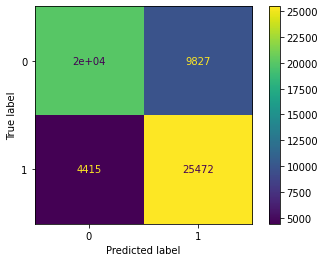

In [10]:
cm = confusion_matrix(y_test, prediction2, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

<AxesSubplot:>

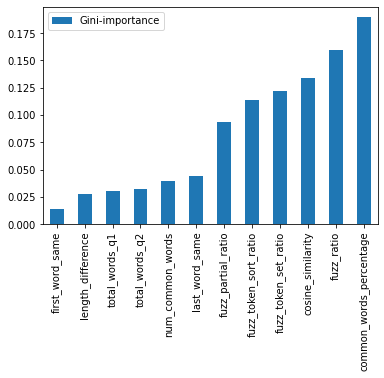

In [14]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)